In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

submission_path = '../input/advanced-dls-spring-2021/submission.csv'
test_path = '../input/advanced-dls-spring-2021/test.csv'
train_path = '../input/advanced-dls-spring-2021/train.csv'

# Data Loading

In [2]:
data_train = pd.read_csv('./train.csv')

1) Посмотрите на случайные строчки.

In [3]:
data_train.info()
data_train.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4371,38,85.40,3297,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4569,6,80.80,457.1,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0
1500,35,95.50,3418.2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,0
2804,16,54.85,916.15,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
4554,1,45.65,45.65,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
178,72,95.10,6843.15,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Two year,Yes,Electronic check,0
537,71,97.65,6687.85,Male,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,One year,No,Credit card (automatic),0
4587,36,55.80,1941.5,Female,0,No,No,Yes,Yes,DSL,No,No,Yes,No,No,No,One year,No,Electronic check,0
3459,71,19.60,1387.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
4208,1,19.05,19.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
data_train.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

NaN'ов не обнаружено.

In [6]:
(data_train == ' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Однако в столбце TotalSpent есть пробелы. Заменим их на среднее арифметическое:

In [7]:
data_train["TotalSpent"] = data_train["TotalSpent"].apply(pd.to_numeric,errors='coerce')
data_train["TotalSpent"] = data_train["TotalSpent"].astype('float64')
data_train['TotalSpent'].fillna(value=data_train['TotalSpent'].mean(), inplace=True)
(data_train == ' ').sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Data Analysis

Изучим числовые признаки:

In [8]:
data_train[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


1) Для численных признаков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). 

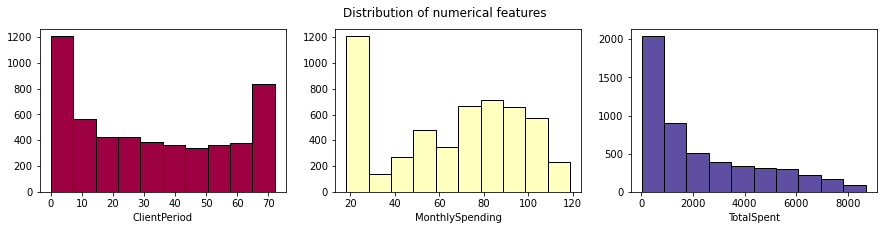

In [9]:
def get_cmap(n, name='Spectral'): #цветовая тема
    return plt.cm.get_cmap(name, n)

colors = get_cmap(3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
fig.suptitle('Distribution of numerical features')


for index, axis in enumerate(axes):
    axis.hist(data_train[num_cols[index]], color = colors(index), ec="black")
    axis.set_xlabel(num_cols[index])

Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, если вы сможете это сделать на одном графике с помощью plt.subplots(...)).

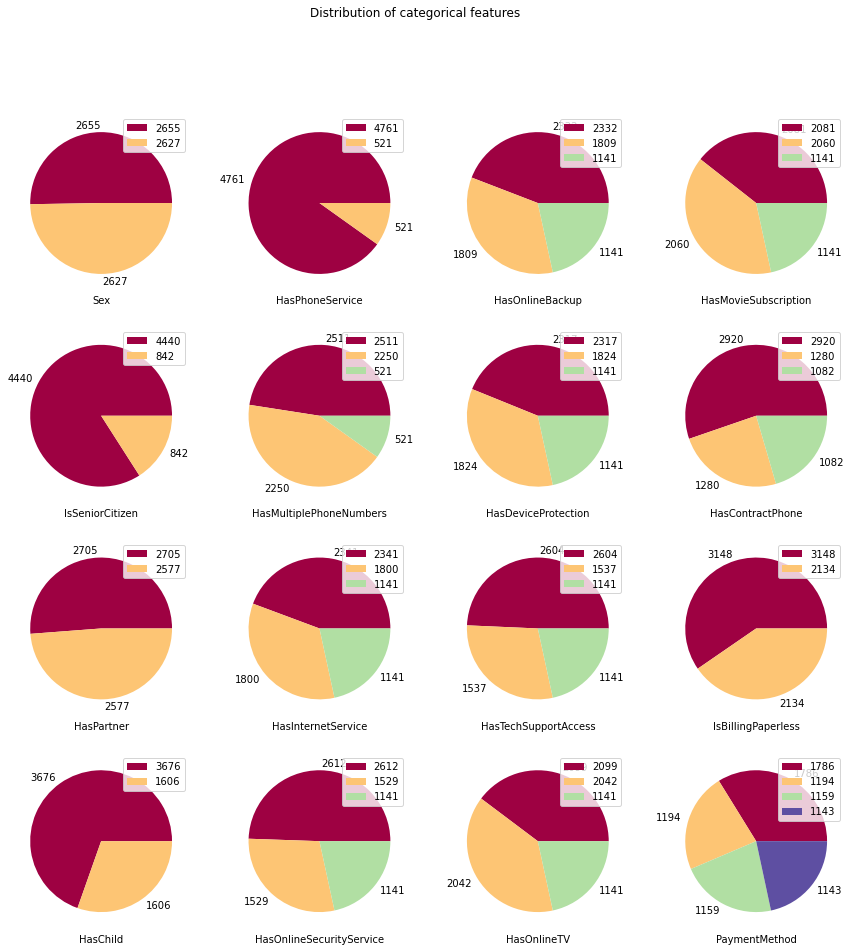

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
fig.suptitle('Distribution of categorical features')

colors = get_cmap(16)
for index, axis in enumerate(cat_cols):
    row, col = index%4, index//4
    axes[row, col].set_prop_cycle("color", plt.cm.Spectral(np.linspace(0,10,30)))
    axes[row, col].pie(data_train[cat_cols[index]].value_counts(), labels = data_train[axis].value_counts())
    axes[row, col].set_xlabel(cat_cols[index])
    axes[row, col].legend()

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

<AxesSubplot:>

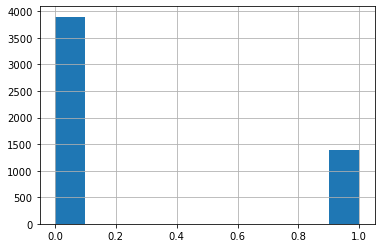

In [11]:
data_train[target_col].hist()

In [12]:
target_rate = data_train[data_train.Churn == 1].shape[0]/data_train.shape[0]
target_rate

0.26202196137826583

Классы не являются несбалансированными (разница не слишком велика).

# Logistic Regression
1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer

In [15]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

logreg_transformer = ColumnTransformer(transformers=[
                                ('num', RobustScaler(), num_cols),
                                ('cat_label', OrdinalEncoder(), cat_cols),
                                ('cat_OH', OneHotEncoder(), cat_cols)
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

#pipeline = make_pipeline(logreg_transformer, LogisticRegression(n_jobs=-1))
#param_grid = {
#    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
#    'logisticregression__penalty': ['l1', 'l2'],
#    'logisticregression__max_iter' : [100, 300, 500, 1000],
#    'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#}
#grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc')
#grid.fit(X, y)

In [16]:
#grid.best_params_

Выше при помощи GridSearchCV были выбраны лучшие параметры:

In [17]:
pipeline = make_pipeline(
                         logreg_transformer, 
                         LogisticRegression(**{'C' : 100, 'max_iter' : 500, 'solver' : 'saga', 'penalty': 'l1'})
)
pipeline.fit(X_train, y_train)
probs = pipeline.predict_proba(X_valid)[:, 1]

In [18]:
print('Best ROC-AUC score -', str(roc_auc_score(y_valid, probs)))
print('Params:')
for i in {'C' : 100, 'max_iter' : 500, 'solver' : 'saga', 'penalty': 'l1'}.items():
    print(i[0], ": ", i[1])

Best ROC-AUC score - 0.8572494717439194
Params:
C :  100
max_iter :  500
solver :  saga
penalty :  l1


Лучший результат метрики: 0.8572.

# Gradient Boosting

In [20]:
!pip install catboost

In [27]:
from catboost import CatBoostClassifier, Pool

## Default settings

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

train_dataset = Pool(X_train, y_train, cat_cols)
val_dataset = Pool(X_valid, y_valid, cat_cols)

cat_default = CatBoostClassifier(logging_level='Silent', eval_metric='AUC:hints=skip_train~false')
cat_default.fit(train_dataset, use_best_model=True, eval_set=val_dataset)

print(f'ROC-AUC score - {roc_auc_score(y_valid, cat_default.predict_proba(val_dataset)[:, 1])}')

ROC-AUC score - 0.8436938813292604


## CatBoost with parameters 

2) Протестируйте разные значения параметра количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

In [41]:
param_grid = {
    'depth': [2, 3, 4],
    'learning_rate': [0.02, 0.03, 0.04],
    'iterations' : [100, 300, 500, 800],
    }
base_params = {
    'logging_level':'Silent',
    'loss_function':'Logloss',
    'l2_leaf_reg': 3,
    'random_strength': 1.2,
    'eval_metric': 'AUC:hints=skip_train~false', 
}
cat_param = CatBoostClassifier(**base_params)
search = cat_param.grid_search(param_grid, train_dataset, cv=5)
cat_param.fit(train_dataset, use_best_model=True, eval_set=val_dataset)
print(search['params'])
print(f'Best ROC-AUC score - {roc_auc_score(y_valid, cat_param.predict_proba(val_dataset)[:, 1])}')

0:	loss: 0.8161494	best: 0.8161494 (0)	total: 1.39s	remaining: 48.8s
1:	loss: 0.8207375	best: 0.8207375 (1)	total: 2.83s	remaining: 48.1s
2:	loss: 0.8233286	best: 0.8233286 (2)	total: 4.14s	remaining: 45.6s
3:	loss: 0.8253959	best: 0.8253959 (3)	total: 8.68s	remaining: 1m 9s
4:	loss: 0.8276600	best: 0.8276600 (4)	total: 13s	remaining: 1m 20s
5:	loss: 0.8298152	best: 0.8298152 (5)	total: 17s	remaining: 1m 25s
6:	loss: 0.8287851	best: 0.8298152 (5)	total: 23.9s	remaining: 1m 39s
7:	loss: 0.8309684	best: 0.8309684 (7)	total: 30.5s	remaining: 1m 46s
8:	loss: 0.8316610	best: 0.8316610 (8)	total: 37s	remaining: 1m 51s
9:	loss: 0.8309403	best: 0.8316610 (8)	total: 47.6s	remaining: 2m 3s
10:	loss: 0.8322200	best: 0.8322200 (10)	total: 58.6s	remaining: 2m 13s
11:	loss: 0.8322903	best: 0.8322903 (11)	total: 1m 9s	remaining: 2m 18s
12:	loss: 0.8200695	best: 0.8322903 (11)	total: 1m 11s	remaining: 2m 6s
13:	loss: 0.8238067	best: 0.8322903 (11)	total: 1m 13s	remaining: 1m 56s
14:	loss: 0.8239860	be

Params - 'depth': 3, 'iterations': 500, 'learning_rate': 0.04
Best ROC-AUC score - 0.8658603409516673

# Predictions

Лучшей моделью оказалась CatBoost с параметрами.

In [49]:
best_model = cat_param

In [54]:
data_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

data_test["TotalSpent"] = data_test["TotalSpent"].apply(pd.to_numeric,errors='coerce')
data_test["TotalSpent"] = data_test["TotalSpent"].astype('float64')
data_test['TotalSpent'].fillna(value=data_test['TotalSpent'].mean(), inplace=True)

submission['Churn'] = best_model.predict_proba(data_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission.head(5)

,Id,Churn
0,0,0.048219
1,1,0.641536
2,2,0.640218
3,3,0.018666
4,4,0.010017


# Kaggle
Дарья_Рузанова, 0.85160